In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Path
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

from src.support_civitatis import open_url, soup_to_df, clean_df

In [ ]:
dates = [f"2024-12-{i}" for i in range(22,29)]

df_budapest = []
df_barcelona = []

for date in dates:
    pages_bcn = open_url('barcelona', date)
    df_barcelona.append(clean_df(soup_to_df(pages_bcn)))

    pages_bud = open_url('budapest', date)
    df_budapest.append(clean_df(soup_to_df(pages_bud)))

In [6]:
df_budapest_final = pd.concat(df_budapest)
df_barcelona_final = pd.concat(df_barcelona)

In [7]:
df_budapest_final.to_csv("../data/activities_budapest.csv", index = False)
df_barcelona_final.to_csv("../data/activities_barcelona.csv", index = False)

---

In [18]:
df_bud = pd.read_csv("../data/activities_budapest.csv")
df_bcn = pd.read_csv("../data/activities_barcelona.csv")

In [20]:
print(df_bud.duplicated().value_counts())
print(df_bcn.duplicated().value_counts())

True     342
False     45
Name: count, dtype: int64
True     528
False    144
Name: count, dtype: int64


Since we have scraped all activities from day 22 to 28, it's natural that we have duplicates for activities that take place in different days.

In [35]:
df_bud.drop_duplicates(inplace=True)
df_bcn.drop_duplicates(inplace=True)

Let's analize a bit more in detail the data

In [24]:
df_bud.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,43.0,8.676744,0.796372,6.4,8.1,8.8,9.4,9.9
Price (€),45.0,37.584444,76.365273,0.0,0.0,26.0,36.0,450.0


In [25]:
df_bcn.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,136.0,8.722059,0.823695,5.1,8.300,8.8,9.4,10.0
Price (€),144.0,46.009028,52.514404,0.0,13.875,25.8,55.5,322.0


- `Scores`: Both Budapest and Barcelona have similar average activity scores (around 8.7), with Barcelona showing a slightly wider range, including activities rated as low as 5.1 and as high as 10. Budapest's scores range from 6.4 to 9.9.
  
- `Prices`: Budapest has a lower average price (€37.58) compared to Barcelona (€46.01), but there is much more variability in Budapest, with prices ranging from free activities to as high as €450. In contrast, Barcelona’s prices range from free to €322, showing slightly less variability.

We can check the activities with more `Score` ordered by `Price`(ascending)

In [36]:
df_bcn.sort_values(by=['Score', 'Price (€)'], ascending=[False, True]).head()

,Name,Score,Price (€),Description,Times,Link
59,Free tour de los misterios y leyendas de El Born,10.0,0.0,¿Queréis conocer los enigmas de uno de los bar...,['10:00'],https://www.civitatis.com/es/barcelona/free-to...
53,Entrada al Museo Banksy de Barcelona,10.0,14.0,Con vuestra entrada al Museo Banksy de Barcelo...,NaN,https://www.civitatis.com/es/barcelona/entrada...
60,Espectáculo flamenco en Casa Sors + Visita al ...,10.0,35.0,En este espectáculo flamenco en Casa Sors podr...,"['18:30', '19:30', '20:30']",https://www.civitatis.com/es/barcelona/especta...
12,Excursión a Montserrat + Visita a una bodega,10.0,79.9,En esta excursión a Montserrat no solo disfrut...,['8:45'],https://www.civitatis.com/es/barcelona/tour-ta...
533,Espectáculo flamenco en el Tablao de Carmen,10.0,85.0,¿Queréis experimentar lo mejor de la cultura e...,NaN,https://www.civitatis.com/es/barcelona/especta...


In [37]:
df_bud.sort_values(by=['Score', 'Price (€)'], ascending=[False, True]).head()

,Name,Score,Price (€),Description,Times,Link
349,Tour del comunismo por Budapest,9.9,15.0,"Si sois unos apasionados de la historia, no os...",['10:00'],https://www.civitatis.com/es/budapest/tour-com...
7,Free tour por el Budapest histórico,9.6,0.0,Recorred la parte sur de la capital húngara y...,"['10:30', '12:00', '16:00']",https://www.civitatis.com/es/budapest/free-tou...
96,Free tour por el Budapest histórico,9.6,0.0,Recorred la parte sur de la capital húngara y...,"['10:30', '16:00']",https://www.civitatis.com/es/budapest/free-tou...
239,Free tour por el Budapest histórico,9.6,0.0,Recorred la parte sur de la capital húngara y...,"['10:30', '16:00', '12:00']",https://www.civitatis.com/es/budapest/free-tou...
361,Free tour por el Budapest histórico,9.6,0.0,Recorred la parte sur de la capital húngara y...,"['10:30', '12:00', '16:00', '10:00']",https://www.civitatis.com/es/budapest/free-tou...


We can build a scatter plot that shows the relation between Score and Price

In [51]:
# We create tags to differenciate the cities
df_bud['City'] = 'Budapest'
df_bcn['City'] = 'Barcelona'

# We build a dataframe that combines both cities
df = pd.concat([df_bud, df_bcn], axis = 0)
# Remove duplicate index to avoid plot issues
df.reset_index(drop=True, inplace=True)

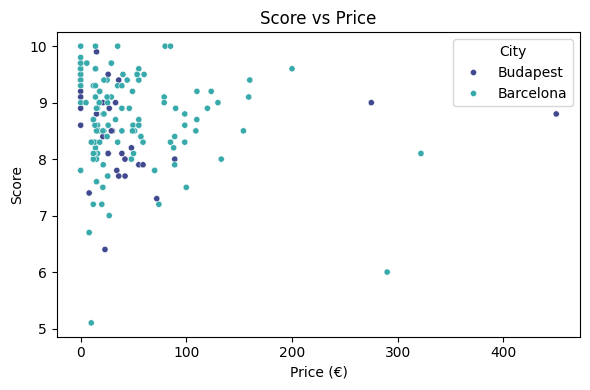

In [63]:
plt.figure(figsize = (6, 4))

sns.scatterplot(x = "Price (€)",
                y = "Score",
                data = df,
                hue = "City",
                palette= "mako",
                s = 20)
            
plt.xlabel("Price (€)")
plt.ylabel("Score")
plt.title("Score vs Price")

plt.tight_layout()
plt.show()

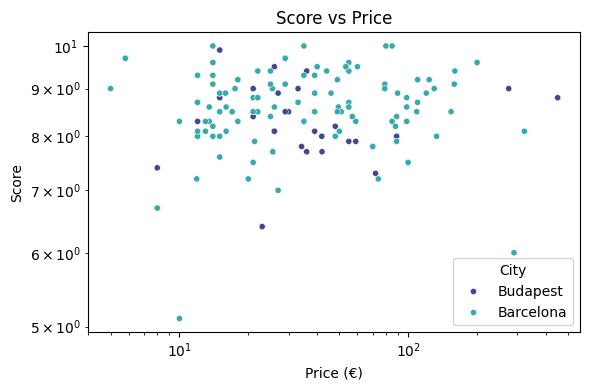

In [64]:
plt.figure(figsize = (6, 4))

sns.scatterplot(x = "Price (€)",
                y = "Score",
                data = df,
                hue = "City",
                palette= "mako",
                s = 20)
            
plt.xlabel("Price (€)")
plt.ylabel("Score")
plt.title("Score vs Price")

# We can use a logarithmic scale to better view the results
plt.yscale('log')
plt.xscale('log')

plt.tight_layout()
plt.show()

We can see that there is no visual correlation between `Price` and `Score`

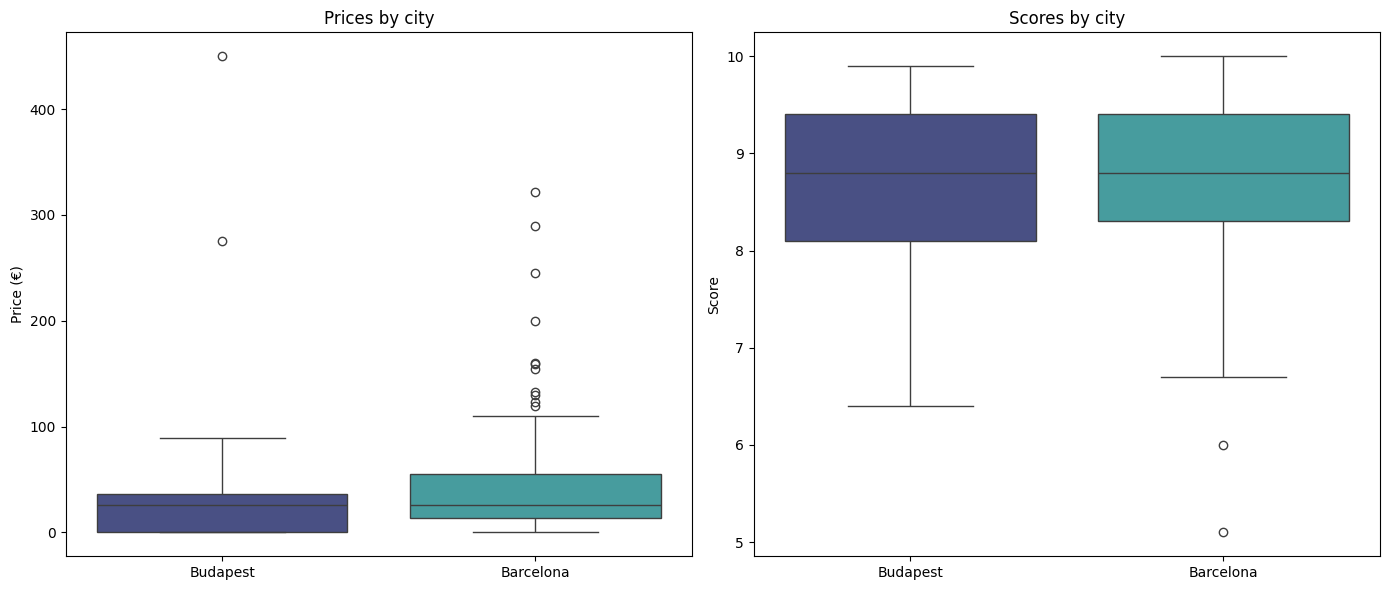

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for prices by city
sns.boxplot(x='City', y='Price (€)', data=df, ax=axes[0], palette='mako')
axes[0].set_title('Prices by city')
axes[0].set_xlabel('')
axes[0].set_ylabel('Price (€)')

# Boxplot for scores by city
sns.boxplot(x='City', y='Score', data=df, ax=axes[1], palette='mako')
axes[1].set_title('Scores by city')
axes[1].set_xlabel('')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()

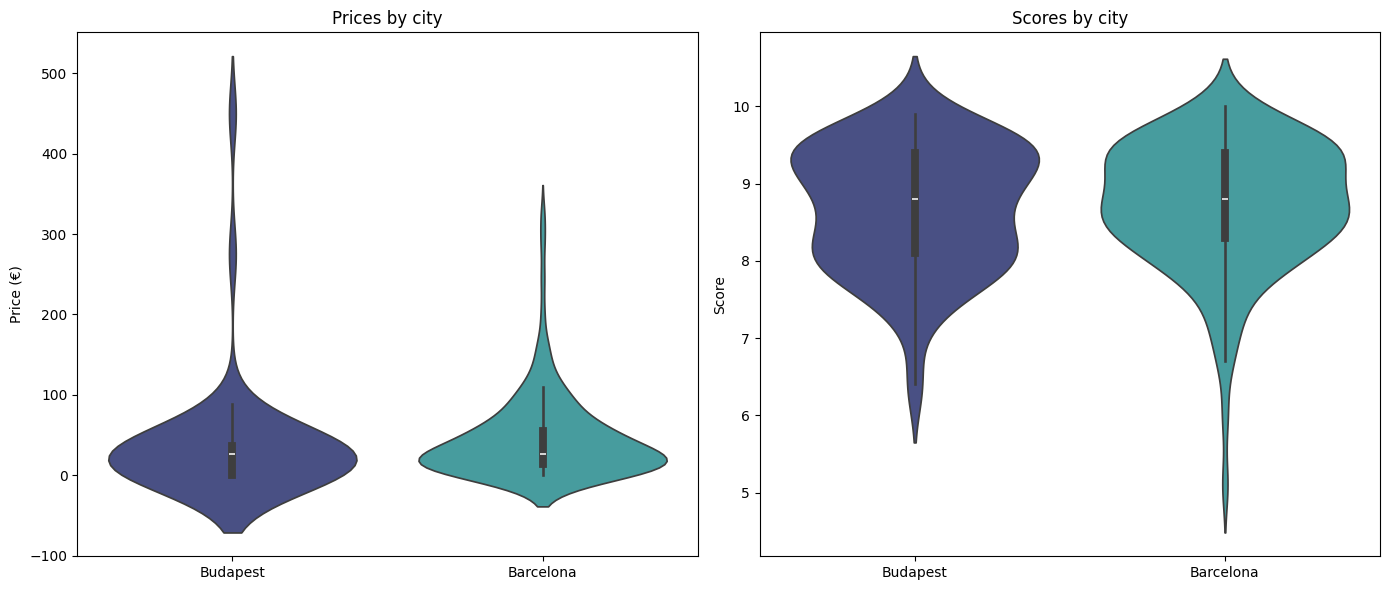

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for prices by city
sns.violinplot(x='City', y='Price (€)', data=df, ax=axes[0], palette='mako')
axes[0].set_title('Prices by city')
axes[0].set_xlabel('')
axes[0].set_ylabel('Price (€)')

# Boxplot for scores by city
sns.violinplot(x='City', y='Score', data=df, ax=axes[1], palette='mako')
axes[1].set_title('Scores by city')
axes[1].set_xlabel('')
axes[1].set_ylabel('Score')

plt.tight_layout()
plt.show()